In [41]:
import pandas as pd
import  psycopg2
from sqlalchemy import create_engine, inspect
import seaborn as sns

In [42]:
host = "czechitaspsql.postgres.database.azure.com"
port = 5432
user = "cimbalakova.hana.3"
username = f"{user}@czechitaspsql"
database = "postgres"
password = "gXeiz4f08NcpQj4n"
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}")

In [43]:
chicago = pd.read_sql('''SELECT * FROM crime WHERE \"PRIMARY_DESCRIPTION\" = 'MOTOR VEHICLE THEFT' ''', con=engine)
chicago

,CASE#,DATE_OF_OCCURRENCE,BLOCK,IUCR,PRIMARY_DESCRIPTION,SECONDARY_DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JE266537,06/15/2021 08:10:00 AM,099XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,2213,19.0,07,1162136.0,1838580.0,41.712721,-87.681814,"(41.712720927, -87.681813981)"
1,JD392821,10/08/2020 01:37:00 PM,048XX W IRVING PARK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,1634,45.0,07,1143291.0,1926152.0,41.953402,-87.748648,"(41.953401827, -87.748648437)"
2,JD394946,10/08/2020 12:30:00 AM,069XX S HALSTED ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,732,6.0,07,1172166.0,1858840.0,41.768103,-87.644487,"(41.768102953, -87.644487)"
3,JE130847,02/01/2021 10:00:00 AM,097XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,2213,19.0,07,1162091.0,1840033.0,41.716709,-87.681939,"(41.716709137, -87.681938527)"
4,JD392370,10/08/2020 02:45:00 AM,0000X N PARKSIDE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,1513,29.0,07,1138597.0,1899869.0,41.881365,-87.766543,"(41.881364879, -87.766542785)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,JD423291,10/31/2020 05:00:00 PM,012XX W 74TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,734,17.0,07,1169184.0,1855377.0,41.758665,-87.655517,"(41.758665049, -87.65551744)"
10101,JD415846,10/30/2020 06:45:00 PM,002XX W CERMAK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,914,25.0,07,1175049.0,1889742.0,41.852837,-87.632996,"(41.852837101, -87.632996441)"
10102,JD411880,10/25/2020 12:00:00 PM,054XX S WELLS ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,935,3.0,07,1175532.0,1868850.0,41.795497,-87.631850,"(41.795496825, -87.631849763)"
10103,JD402510,10/10/2020 06:00:00 PM,063XX S HARVARD AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,722,20.0,07,1175149.0,1863083.0,41.779680,-87.633426,"(41.77968014, -87.633426382)"


In [44]:
chicago_cars = chicago.loc[chicago['SECONDARY_DESCRIPTION'] == 'AUTOMOBILE']
chicago_cars

,CASE#,DATE_OF_OCCURRENCE,BLOCK,IUCR,PRIMARY_DESCRIPTION,SECONDARY_DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JE266537,06/15/2021 08:10:00 AM,099XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,2213,19.0,07,1162136.0,1838580.0,41.712721,-87.681814,"(41.712720927, -87.681813981)"
1,JD392821,10/08/2020 01:37:00 PM,048XX W IRVING PARK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,1634,45.0,07,1143291.0,1926152.0,41.953402,-87.748648,"(41.953401827, -87.748648437)"
2,JD394946,10/08/2020 12:30:00 AM,069XX S HALSTED ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,732,6.0,07,1172166.0,1858840.0,41.768103,-87.644487,"(41.768102953, -87.644487)"
3,JE130847,02/01/2021 10:00:00 AM,097XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,2213,19.0,07,1162091.0,1840033.0,41.716709,-87.681939,"(41.716709137, -87.681938527)"
4,JD392370,10/08/2020 02:45:00 AM,0000X N PARKSIDE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,1513,29.0,07,1138597.0,1899869.0,41.881365,-87.766543,"(41.881364879, -87.766542785)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,JD405839,10/20/2020 02:00:00 PM,002XX N WELLS ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,122,42.0,07,1174694.0,1901831.0,41.886018,-87.633938,"(41.886018055, -87.633937881)"
10100,JD423291,10/31/2020 05:00:00 PM,012XX W 74TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,734,17.0,07,1169184.0,1855377.0,41.758665,-87.655517,"(41.758665049, -87.65551744)"
10101,JD415846,10/30/2020 06:45:00 PM,002XX W CERMAK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,914,25.0,07,1175049.0,1889742.0,41.852837,-87.632996,"(41.852837101, -87.632996441)"
10102,JD411880,10/25/2020 12:00:00 PM,054XX S WELLS ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,935,3.0,07,1175532.0,1868850.0,41.795497,-87.631850,"(41.795496825, -87.631849763)"


In [46]:
chicago_cars["DATE_OF_OCCURRENCE"] = pd.to_datetime(chicago_cars["DATE_OF_OCCURRENCE"])
chicago_cars["month"] = chicago_cars["DATE_OF_OCCURRENCE"].dt.month
chicago_cars["year"] = chicago_cars["DATE_OF_OCCURRENCE"].dt.year
chicago_cars

<ipython-input-46-4c7721880212>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_cars["DATE_OF_OCCURRENCE"] = pd.to_datetime(chicago_cars["DATE_OF_OCCURRENCE"])
<ipython-input-46-4c7721880212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_cars["month"] = chicago_cars["DATE_OF_OCCURRENCE"].dt.month
<ipython-input-46-4c7721880212>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,CASE#,DATE_OF_OCCURRENCE,BLOCK,IUCR,PRIMARY_DESCRIPTION,SECONDARY_DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,month,year
0,JE266537,2021-06-15 08:10:00,099XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,2213,19.0,07,1162136.0,1838580.0,41.712721,-87.681814,"(41.712720927, -87.681813981)",6,2021
1,JD392821,2020-10-08 13:37:00,048XX W IRVING PARK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,1634,45.0,07,1143291.0,1926152.0,41.953402,-87.748648,"(41.953401827, -87.748648437)",10,2020
2,JD394946,2020-10-08 00:30:00,069XX S HALSTED ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,732,6.0,07,1172166.0,1858840.0,41.768103,-87.644487,"(41.768102953, -87.644487)",10,2020
3,JE130847,2021-02-01 10:00:00,097XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,2213,19.0,07,1162091.0,1840033.0,41.716709,-87.681939,"(41.716709137, -87.681938527)",2,2021
4,JD392370,2020-10-08 02:45:00,0000X N PARKSIDE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,1513,29.0,07,1138597.0,1899869.0,41.881365,-87.766543,"(41.881364879, -87.766542785)",10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,JD405839,2020-10-20 14:00:00,002XX N WELLS ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,122,42.0,07,1174694.0,1901831.0,41.886018,-87.633938,"(41.886018055, -87.633937881)",10,2020
10100,JD423291,2020-10-31 17:00:00,012XX W 74TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,734,17.0,07,1169184.0,1855377.0,41.758665,-87.655517,"(41.758665049, -87.65551744)",10,2020
10101,JD415846,2020-10-30 18:45:00,002XX W CERMAK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,914,25.0,07,1175049.0,1889742.0,41.852837,-87.632996,"(41.852837101, -87.632996441)",10,2020
10102,JD411880,2020-10-25 12:00:00,054XX S WELLS ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,N,N,935,3.0,07,1175532.0,1868850.0,41.795497,-87.631850,"(41.795496825, -87.631849763)",10,2020


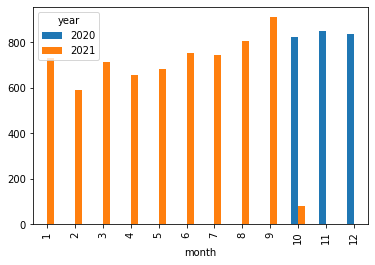

In [49]:
pivot_cars = pd.pivot_table(chicago_cars, index=("month"), columns=("year"), values="CASE#", aggfunc="count").plot(kind="bar")

Máme malou historii, ale ve sledovaném období bylo nejvíce ukradených aut v září.